In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


In [4]:
import requests
from bs4 import BeautifulSoup

aj_url = "https://www.aljazeera.com/tag/israel-palestine-conflict/"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(aj_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

paragraphs = soup.find_all("p")
aj_text = " ".join([p.get_text() for p in paragraphs])

len(aj_text), aj_text[:500]



(1068,
 'Halawa family adapts to shattered surroundings, finding resilience in every corner of their damaged Gaza City residence. Kamran Ahmed and Amu Gib have been hospitalised as a protest that began 50 days ago raises alarm. Gaza’s Health Ministry says the most critical drug shortages are in emergency services. As Gaza’s displaced Palestinians suffer from winter storms, UNICEF explains the basic needs essential to save children. A global roundup of some of last week’s events. Israeli forces kill two P')

In [5]:
from textblob import TextBlob

aj_sentiment = TextBlob(aj_text).sentiment.polarity
aj_sentiment


0.04583333333333334

In [6]:
cnn_url = "https://edition.cnn.com/world/middle-east"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(cnn_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

paragraphs = soup.find_all("p")
cnn_text = " ".join([p.get_text() for p in paragraphs])

len(cnn_text), cnn_text[:500]


(242,
 '© 2025 Cable News Network. A Warner Bros. Discovery Company. All Rights Reserved.  CNN Sans ™ & © 2016 Cable News Network. Scan the QR code to download the CNN app on Google Play. Scan the QR code to download the CNN app from the Apple Store.')

In [7]:
cnn_sentiment = TextBlob(cnn_text).sentiment.polarity
cnn_sentiment


0.0

In [8]:
import pandas as pd

df = pd.DataFrame({
    "Source": ["Al Jazeera", "CNN"],
    "Sentiment": [aj_sentiment, cnn_sentiment]
})

df


,Source,Sentiment
0,Al Jazeera,0.045833
1,CNN,0.000000


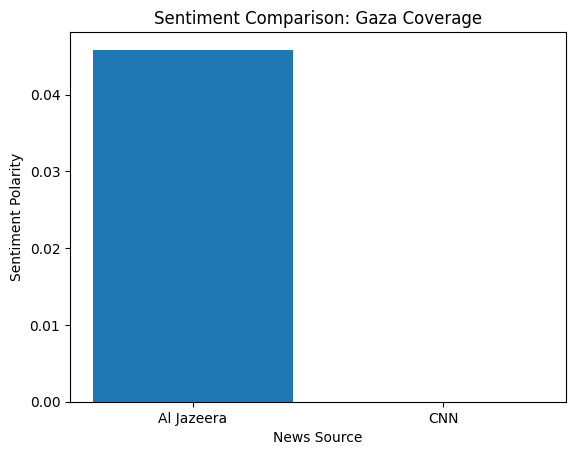

In [9]:
import matplotlib.pyplot as plt

plt.bar(df["Source"], df["Sentiment"])
plt.title("Sentiment Comparison: Gaza Coverage")
plt.ylabel("Sentiment Polarity")
plt.xlabel("News Source")
plt.show()
